In [1]:
# Importujeme základní vykreslovací modul
import matplotlib.pyplot as plt 

# A samozřejmě numpy
import numpy as np

# Občas se hodí i matematika
import math

# Další typy 2D grafů

Zatím jsme pracovali pouze s metodou `plot` a kreslili jsme čárové grafy. Kromě čárových pak existuje ještě mnoho dalších typů grafu. Jejich kompletní výčet najdete v [galerii](https://matplotlib.org/2.0.2/gallery.html). Uvádíme některé z nich pro ukázku:

In [ ]:
import numpy.random as random

x = np.linspace(-1, 5, 50)
n = np.array([0,1,2,3,4,5])
xx = np.linspace(0, 1, 100) + random.randn(100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

# Bodový graf
axes[0].scatter(xx, xx + random.randn(len(xx)))

# Schodový graf
axes[1].step(n, n**2, lw=2)

# Sloupcový graf
axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

# Výplň mezi křivkami
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)
plt.show()

## Histogram

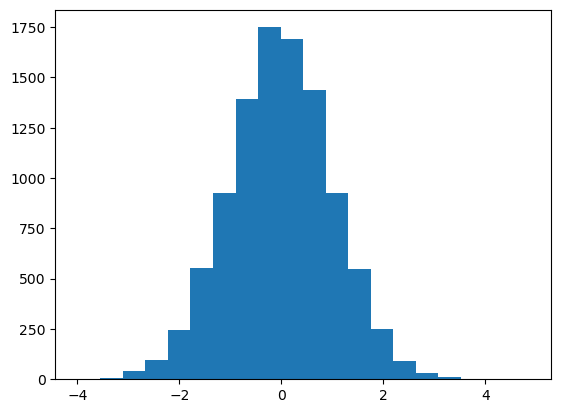

In [2]:
n = np.random.randn(10000)     # Spousta náhodných čísel (norm.rozdělení)
plt.hist(n, 20)                # Histogram o 20 "binech"
plt.show()

## Polární grafy

Můžeme samozřejmě vytvářet i polární grafy, stačí jen správně zadat argumenty metody `add_axes`:

PolarAxes(0,0;1x1)
[ 0.          0.06289475  0.1257895   0.18868424  0.25157899  0.31447374
  0.37736849  0.44026323  0.50315798  0.56605273  0.62894748  0.69184223
  0.75473697  0.81763172  0.88052647  0.94342122  1.00631597  1.06921071
  1.13210546  1.19500021  1.25789496  1.3207897   1.38368445  1.4465792
  1.50947395  1.5723687   1.63526344  1.69815819  1.76105294  1.82394769
  1.88684243  1.94973718  2.01263193  2.07552668  2.13842143  2.20131617
  2.26421092  2.32710567  2.39000042  2.45289516  2.51578991  2.57868466
  2.64157941  2.70447416  2.7673689   2.83026365  2.8931584   2.95605315
  3.0189479   3.08184264  3.14473739  3.20763214  3.27052689  3.33342163
  3.39631638  3.45921113  3.52210588  3.58500063  3.64789537  3.71079012
  3.77368487  3.83657962  3.89947436  3.96236911  4.02526386  4.08815861
  4.15105336  4.2139481   4.27684285  4.3397376   4.40263235  4.4655271
  4.52842184  4.59131659  4.65421134  4.71710609  4.78000083  4.84289558
  4.90579033  4.96868508  5.031579

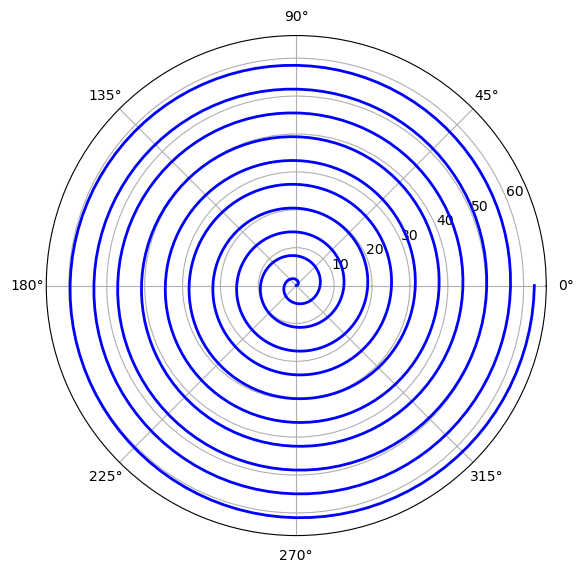

In [5]:
fig = plt.figure(figsize=(5,5))

# Polární souřadnice
ax = fig.add_axes((0, 0, 1, 1), polar=True)
print(ax)
t = np.linspace(0, 10*2 * math.pi, 1000)
print(t)
# Jednoduchá spirála
ax.plot(t, t, color='blue', lw=2)
plt.show()

## Dvourozměrná vizualizace dvoudimenzionálních dat

Pokud máme vizualizovat hodnoty závislé na hodnotách dvou parametrů, $z = f(x, y)$, můžeme buď hodnoty kódovat barevně, nebo pomocí obrysového grafu. Ukážeme si obojí.

In [ ]:
# Náhodně zhůvěřilá funkce
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)
Z = ((np.sin((X + Y) ** 1.5) + 1.01) / 2) ** (np.cos(Y*3) + 1) + np.sin((X + Y) / 20)

## `pcolor` vs. `pcolormesh` (barevné kódování hodnot)

Obě funkce, `pcolor` a `pcolormesh`, slouží v knihovně Matplotlib pro vizualizaci dvourozměrných dat pomocí barevného kódování. Rozdíl mezi nimi spočívá především v jejich výkonu a způsobu vykreslování. Očekávají následující základní vstupy:

- **X, Y**: Souřadnice mřížky, na které jsou hodnoty zobrazeny.
- **C**: Dvourozměrné pole hodnot, které mají být zobrazeny. Velikost pole C by měla odpovídat rozměrům mřížky definované X a Y.
- **cmap**: Barevná paleta použitá pro kódování hodnot.

#### Parametr `cmap`
Parametr `cmap` určuje barevnou paletu použitou pro kódování hodnot. Matplotlib nabízí řadu vestavěných palet, které můžete prozkoumat v [dokumentaci](https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html).

#### Vytvoření legendy
Příkaz `colorbar()` přidá k grafu barevnou legendu, což umožňuje uživatelům snadno interpretovat, které hodnoty jednotlivé barvy reprezentují.

Lze také omezit rozmezí barev, které se zobrazí, pomocí parametrů `vmin` a `vmax`.

In [ ]:
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
fig, ax = plt.subplots()

p = ax.pcolor(X, Y, Z, shading='auto', cmap="jet", vmin=0.5, vmax=1)
cb = fig.colorbar(p, ax=ax)
plt.show()

## `imshow` (obrazová data)

Pokud chceme vykreslit pouze obrázek `Z` hodnot a nezajímá nás osa `X` a `Y` (například je uniformě dělená a konkrétní hodnoty nejsou důležité), můžeme použít funkci `imshow`. Tato funkce je obzvlášť užitečná pro zobrazení obrázků, apod..

Můžeme nastavit rozsah osy `X` a `Y` pomocí parametru `extent`, ale jedná se pouze o lineární přeznačení os.



In [ ]:
fig, ax = plt.subplots()

im = plt.imshow(Z, cmap="gray", extent=(3, 5, 1, 4))

plt.colorbar()
plt.show()

Pozor na grafy, které nemají uniformní dělení osy `X` a `Y` :

In [ ]:
# Náhodně zhůvěřilá funkce
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 5, 7, 8])
X, Y = np.meshgrid(x, y)
Z = ((np.sin((X + Y) ** 1.5) + 1.01) / 2) ** (np.cos(Y * 3) + 1) + np.sin((X + Y) / 20)
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.show()
plt.imshow(Z, cmap='viridis', origin='lower', extent=(0, 5, 0, 8), aspect='auto')
plt.show()

## `contour`/`contourf` (obrysový graf)
- `contour` vytvoří obrysový graf
- `contourf` vytvoří obrysový graf, který je vyplněný barvou
Podrobnosti viz [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html).

In [ ]:
# Náhodně zhůvěřilá funkce
x = np.linspace(0, 6, 1000)
y = np.linspace(0, 6, 1000)
X, Y = np.meshgrid(x, y)
Z = ((np.sin((X + Y) ** 1.5) + 1.01) / 2) ** (np.cos(Y * 3) + 1) + np.sin((X + Y) / 20)

cnt = plt.contour(X, Y, Z, 10, cmap="jet")
plt.colorbar()
plt.show()

plt.contourf(X, Y, Z, 10, cmap="jet")
plt.colorbar()
plt.contour(X, Y, Z, 10, colors='k')
plt.show()


Ke grafu lze přidat i hodnoty kontur pomocí funkce `clabel`.

In [ ]:
plt.contourf(X, Y, Z, 5, cmap="jet", alpha=0.5)
plt.colorbar()
CS = plt.contour(X, Y, Z, 5, colors='k', linewidths=0.5)
plt.clabel(CS, inline=True, fontsize=5)
plt.show()